In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import statsmodels.api as sm

In [3]:
df = pd.read_excel('book2.xlsx',)
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y')
df.set_index('datetime', inplace=True)

In [4]:
df

,volume
datetime,
2011-11-01,33352.00000
2011-12-01,44436.00000
2012-01-01,22614.00000
2012-02-01,29228.00000
2012-03-01,28118.00000
...,...
2022-11-01,38096.97881
2022-12-01,41102.22270
2023-01-01,29438.01146


<AxesSubplot:xlabel='datetime'>

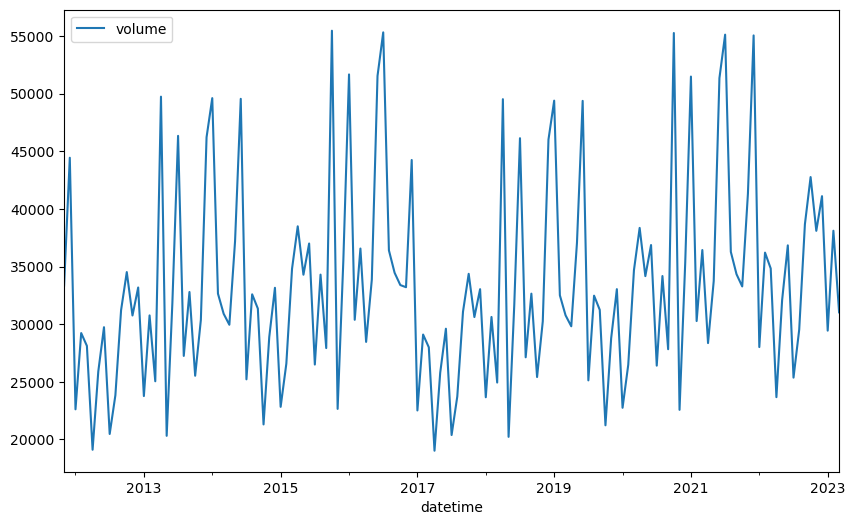

In [5]:
df.plot()

In [6]:
def test_stationarity(sales):
    result=adfuller(sales)
    labels = ['ADF Test statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))

In [7]:
# Load data
indexedDataset = df.copy()
indexedDataset2 = df.copy()

In [8]:
indexedDataset['volume'].max()

55453.409999999996

In [9]:
df['sales_differences'] = df['volume'] - df['volume'].shift(14)

In [10]:
test_stationarity(df['volume'].dropna())

ADF Test statistic : -2.7880777720906207
p-value : 0.059997057630374925
#Lags Used : 13
Number of observations Used : 123


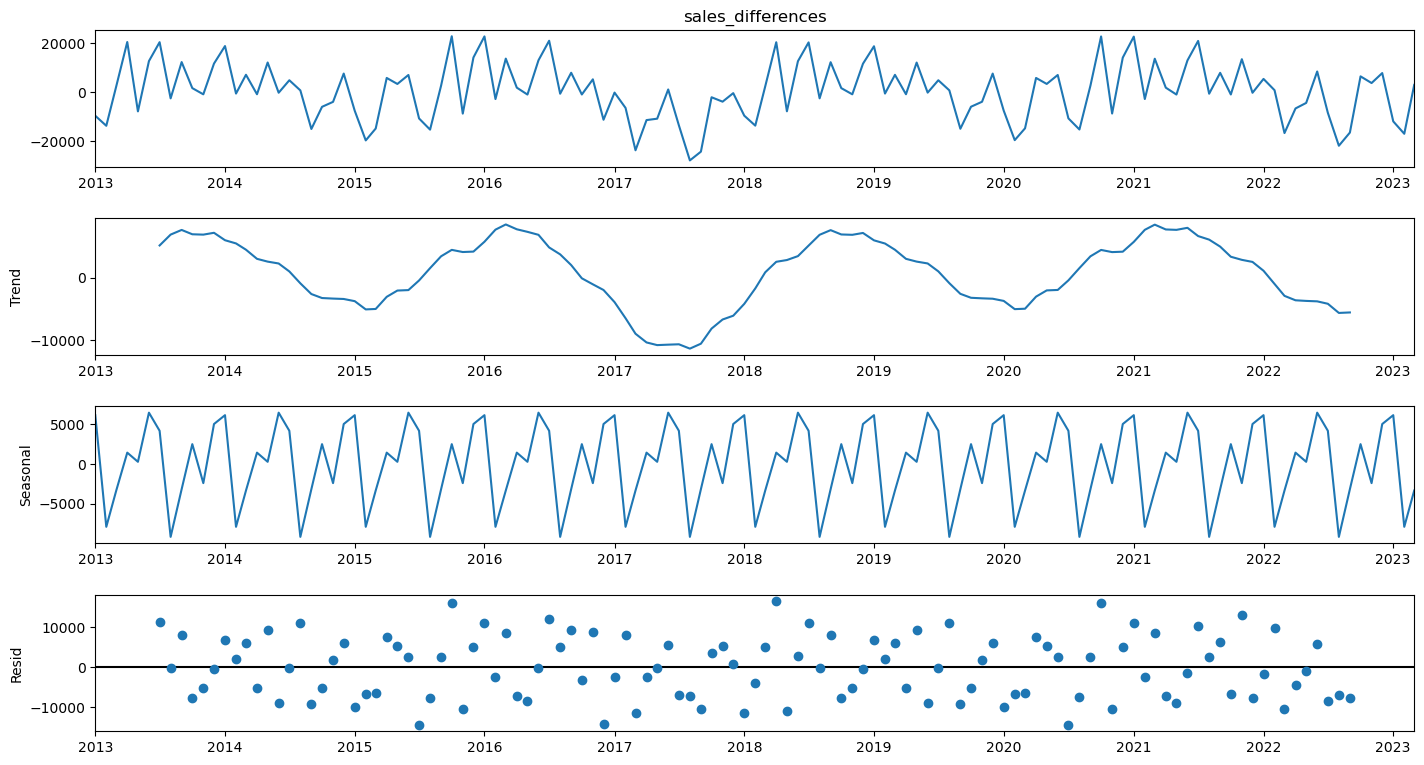

In [11]:
res = sm.tsa.seasonal_decompose(df['sales_differences'].dropna())
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


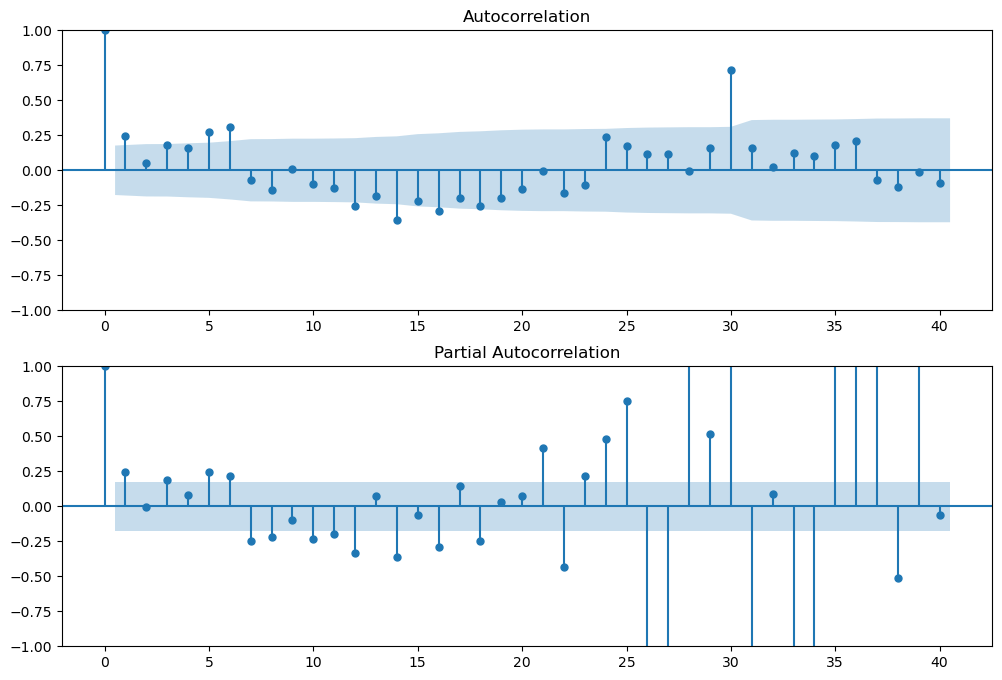

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['sales_differences'].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['sales_differences'].dropna(), lags=40, ax=ax2)

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
model = ARIMA(df['volume'], order = (2,2,2))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 volume   No. Observations:                  137
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1430.417
Date:                Thu, 08 Jun 2023   AIC                           2870.835
Time:                        10:04:59   BIC                           2885.361
Sample:                    11-01-2011   HQIC                          2876.738
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0197      0.126     -0.157      0.876      -0.266       0.227
ar.L2         -0.1559      0.126     -1.233      0.218      -0.404       0.092
ma.L1         -1.8101      0.109    -16.656      0.000      -2.023      -1.597
ma.L2          0.8116      0.104      7.814      0.000       0.608       1.015
sigma2       9.82e+07   2.34e-10    4.2e+17      0.000    9.82e+07    9.82e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.97
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               0.88   Skew:                             0.52
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.27e+33. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='datetime'>

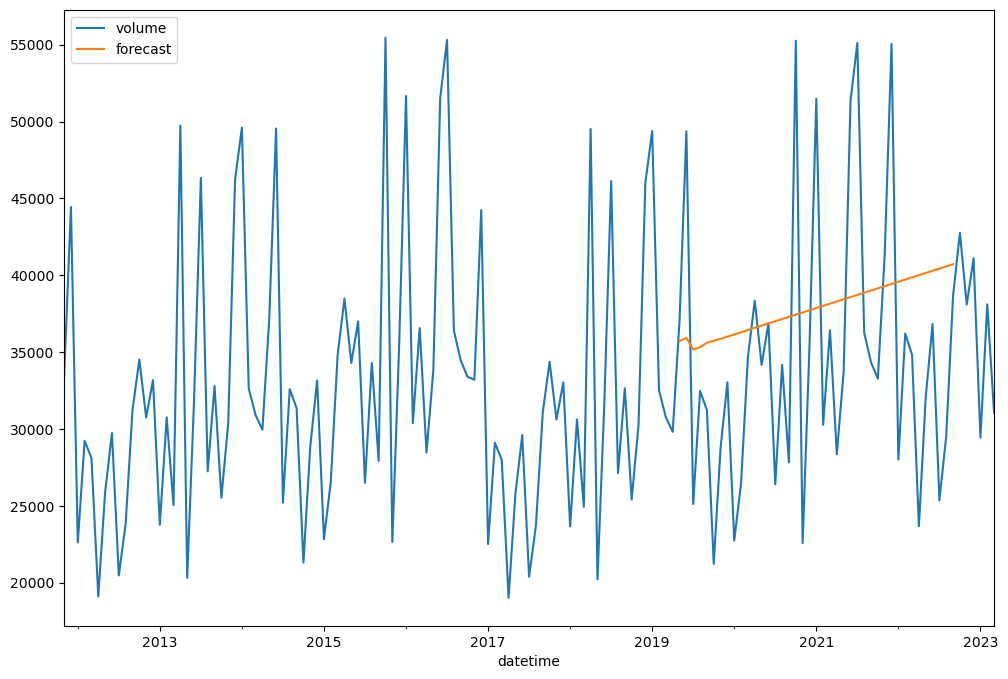

In [17]:
df['forecast']=model_fit.predict(start=90, end=130,dynamic=True)
df[['volume', 'forecast']].plot(figsize=(12,8))

In [21]:
model=sm.tsa.statespace.SARIMAX(df['volume'], order=(2,2,2), seasonal_order=(2,2,2,12))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             volume   No. Observations:                  137
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood               -1250.509
Date:                            Thu, 08 Jun 2023   AIC                           2519.018
Time:                                    10:06:07   BIC                           2543.404
Sample:                                11-01-2011   HQIC                          2528.911
                                     - 03-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4835      0.589     -2.518      0.012      -2.638      -0.329
ar.L2         -0.6776      0.588     -1.152      0.249      -1.830       0.475
ma.L1          0.0015      0.897      0.002      0.999      -1.757       1.760
ma.L2         -0.8446      0.998     -0.846      0.397      -2.800       1.111
ar.S.L12      -1.4581      0.533     -2.735      0.006      -2.503      -0.413
ar.S.L24      -0.8121      0.493     -1.648      0.099      -1.778       0.154
ma.S.L12       0.0817      1.543      0.053      0.958      -2.942       3.105
ma.S.L24      -0.3172      1.205     -0.263      0.792      -2.679       2.045
sigma2      8.084e+08   6.51e-10   1.24e+18      0.000    8.08e+08    8.08e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.96
Prob(Q):                              0.92   Prob(JB):                         0.01
Heteroskedasticity (H):               0.49   Skew:                             0.60
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.27e+35. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='datetime'>

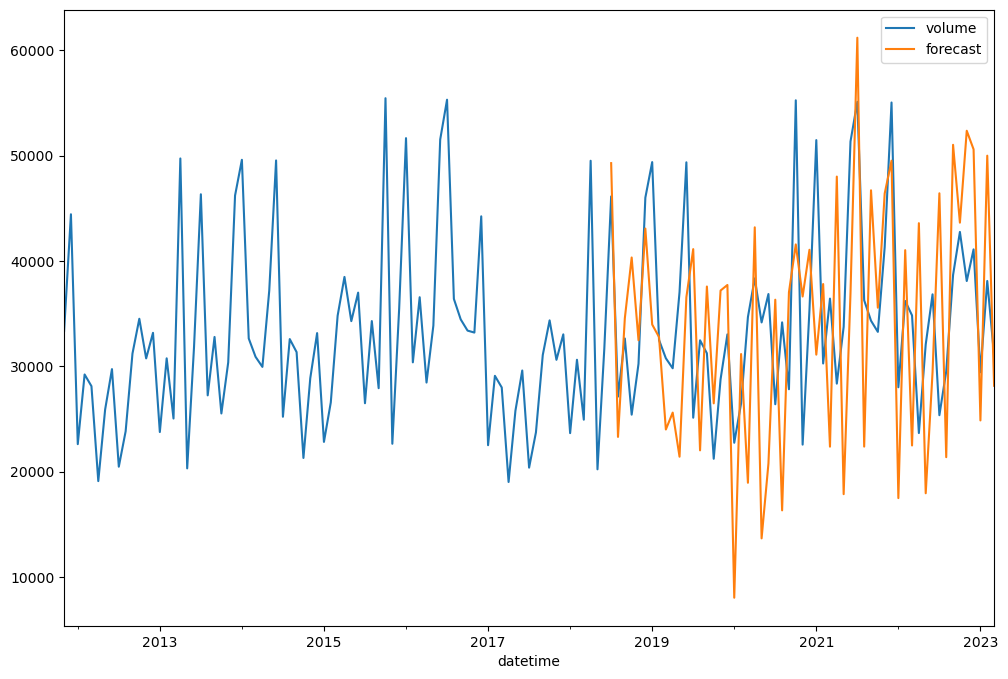

In [23]:
df['forecast']=results.predict(start=80, end=136,dynamic=True)
df[['volume', 'forecast']].plot(figsize=(12,8))

In [24]:
from pandas.tseries.offsets import DateOffset
future_dates= [df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [25]:
future_dataset_df=pd.DataFrame(index = future_dates[1:], columns=df.columns)

In [26]:
future_dataset_df

,volume,sales_differences,forecast
2023-04-01,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN
2023-07-01,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN


In [27]:
future_df = pd.concat([df,future_dataset_df])

<AxesSubplot:>

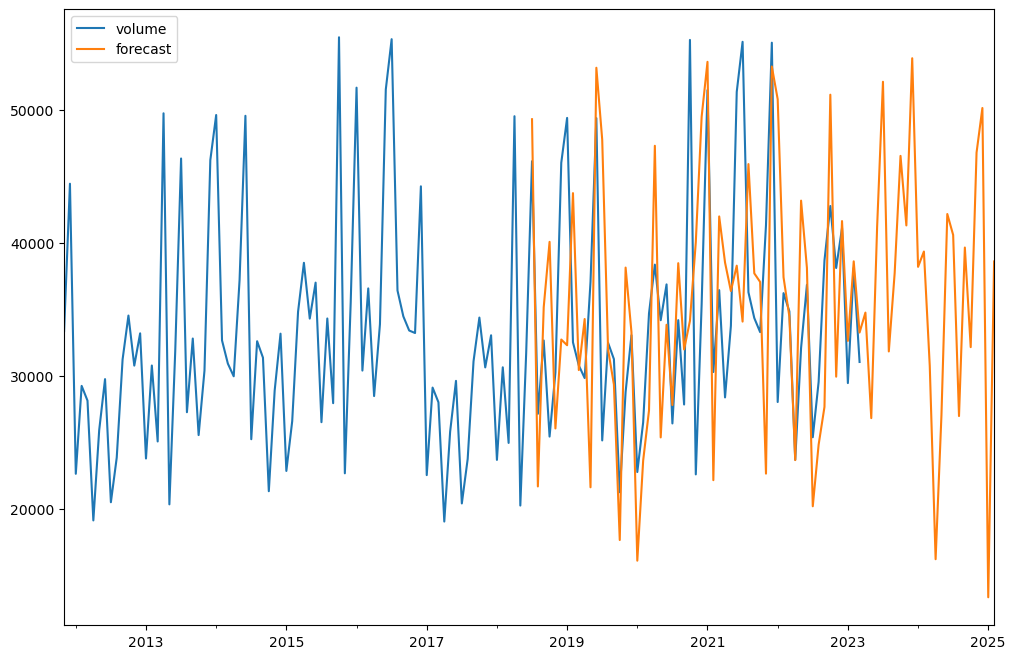

In [28]:
future_df['forecast'] = results.predict(start=80, end=200,dynamic=False)
future_df[['volume', 'forecast']].plot(figsize=(12,8))

In [29]:
from sklearn import metrics

In [32]:
mape = metrics.mean_absolute_percentage_error(future_df['volume'].iloc[80:137],future_df['forecast'].iloc[80:137])
# future_df['volume'].iloc[80:137]
# future_df['forecast'].iloc[80:137]

In [33]:
(1-mape)*100

78.51932661199741

In [31]:
future_df[['volume','forecast']].iloc[130:150]

,volume,forecast
2022-09-01,38669.28824,27645.956981
2022-10-01,42759.69027,51133.652390
2022-11-01,38096.97881,29920.385203
2022-12-01,41102.22270,41626.347888
2023-01-01,29438.01146,32611.683924
2023-02-01,38104.41140,38597.081488
2023-03-01,31026.10819,33240.567671
2023-04-01,NaN,34741.419785
2023-05-01,NaN,26801.359432
2023-06-01,NaN,41187.007544
